In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
np.random.seed(42)

R^2 para datos originales: 0.847
R^2 para datos con trans log: 0.890


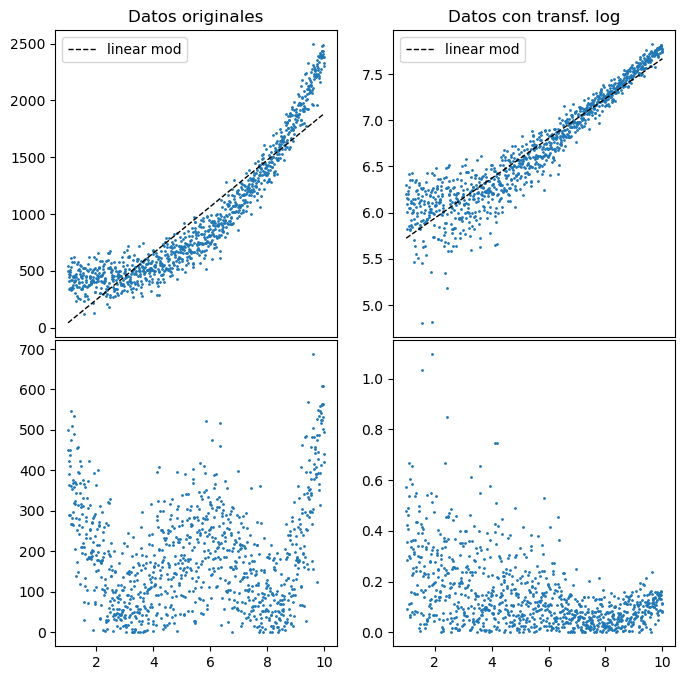

In [182]:
var_x = x = np.linspace(1,10,1000)
var_y = 2*x**3+np.random.normal(0, 100, 1000)+400
var_y_log = np.log(var_y)

lm1 = LinearRegression()
lm1.fit(var_x.reshape(-1, 1), var_y)
print(f'R^2 para datos originales: {lm1.score(var_x.reshape(-1, 1), var_y):.3f}')
prediction_1 = lm1.predict(var_x.reshape(-1, 1))
residuals_1 = abs(var_y - prediction_1)

lm2 = LinearRegression()
lm2.fit(var_x.reshape(-1, 1), var_y_log)
print(f'R^2 para datos con trans log: {lm2.score(var_x.reshape(-1, 1), var_y_log):.3f}')
prediction_2 = lm2.predict(var_x.reshape(-1, 1))
residuals_2 = abs(var_y_log - prediction_2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8), sharex=True, gridspec_kw={'hspace': .01})
ax1.scatter(var_x, var_y, s = 1)
ax1.plot(var_x,var_x*lm1.coef_[0]+lm1.intercept_, color='black', linestyle='--', linewidth=1, label='linear mod')
ax2.scatter(var_x, var_y_log, s = 1)
ax2.plot(var_x,var_x*lm2.coef_[0]+lm2.intercept_, color='black', linestyle='--', linewidth=1, label='linear mod')
ax3.scatter(var_x, residuals_1, s = 1)
ax4.scatter(var_x, residuals_2, s = 1)
ax1.tick_params(axis='x', which='both', bottom=False, top=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False)
ax1.set_title('Datos originales')
ax2.set_title('Datos con transf. log')
ax1.legend()
ax2.legend()
plt.show()


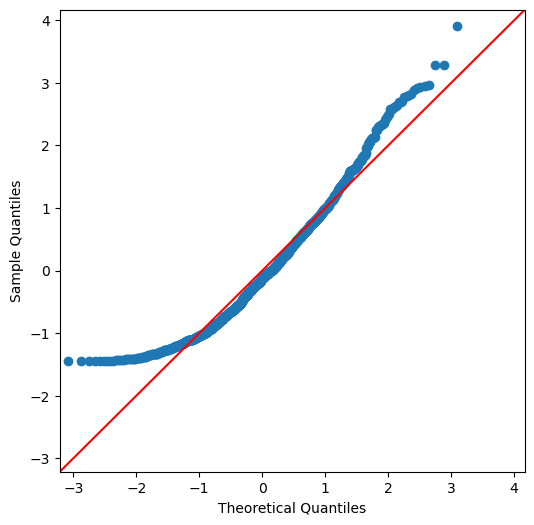

In [183]:
f, ax  = plt.subplots(figsize=(6, 6))  
sm.graphics.qqplot(residuals_1, dist=stats.norm, line='45', fit=True, ax=ax)
plt.show()